In [11]:
from PIL import Image
from matplotlib.pyplot import imshow
import os

#get the list of all images in the folder
def get_imlist(path):
    return [os.path.join(f) for f in os.listdir(path) if f.endswith(".jpg")]

In [2]:
from PIL import Image
from matplotlib.pyplot import imshow
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io
from skimage.color import rgb2grey
from skimage.transform import resize

In [12]:
im_list = get_imlist("C:\\Users\\mulanga.sinyosi\\Documents\\Masters\\PYTHON code\\Tse-tse fly data\\combined\\Resized")
im_list[0]

'A001 - 20170120_100715.jpg'

In [3]:
xl = pd.ExcelFile("annotations_right.xlsx")
df1 = xl.parse('annotations_left')
df1

,Image,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x8,y8,x9,y9,x10,y10,x11,y11,Side,Code
0,A001 - 20170120_100715.jpg,1012.959016,206.738876,749.165105,319.151054,254.551522,626.411007,187.104215,707.347775,702.701405,...,650.242389,701.352459,1045.933255,388.097190,683.216628,476.528103,936.518735,359.619438,Left,1
1,A001 - 20170120_101256.jpg,902.045667,197.745902,624.762295,322.148712,139.141686,666.879391,79.188525,746.317330,588.790398,...,549.820843,711.844262,938.017564,377.605386,573.802108,481.024590,831.600703,349.127635,Left,1
2,A001 - 20170120_101810.jpg,1050.429742,212.734192,764.153396,302.663934,230.570258,570.954333,139.141686,651.891101,698.204918,...,629.258782,681.867682,1068.415691,401.586651,681.717799,460.040984,956.003513,364.115925,Left,1
3,A001 - 20170120_102837.jpg,1039.937939,220.228337,744.668618,347.628806,236.565574,659.385246,161.624122,743.319672,702.701405,...,656.237705,741.820843,1072.912178,422.570258,677.221311,516.996487,953.005855,388.097190,Left,1
4,A001 - 20170120_103322.jpg,840.593677,146.785714,582.795082,305.661593,133.146370,686.364169,68.696721,785.286885,554.317330,...,549.820843,692.359485,908.040984,329.642857,543.825527,473.530445,786.635831,317.652225,Left,1
5,A001 - 20170120_104149.jpg,1051.928571,215.731850,768.649883,314.654567,229.071429,591.937939,146.635831,671.375878,707.197892,...,629.258782,699.853630,1074.411007,406.083138,684.715457,469.033958,960.500000,367.113583,Left,1
6,A001 - 20170120_111532.jpg,1023.450820,190.251756,720.687354,269.689696,172.115925,525.989461,86.682670,600.930913,674.223653,...,566.307963,663.881733,1030.944965,385.099532,642.748244,422.570258,917.033958,338.635831,Left,1
7,A001 - 20170120_112156.jpg,969.492974,272.687354,675.722482,380.603045,157.127635,677.371194,88.181499,747.816159,629.258782,...,569.305621,756.809133,993.474239,457.043326,611.272834,533.483607,876.565574,431.563232,Left,1
8,A001 - 20170120_112434.jpg,846.588993,158.776347,578.298595,313.155738,100.172131,701.352459,40.218970,783.788056,542.326698,...,521.343091,728.331382,899.048009,343.132318,528.837237,490.017564,780.640515,331.141686,Left,1
9,A001 - 20170120_113029.jpg,869.071429,205.240047,591.788056,334.139344,94.176815,677.371194,35.722482,759.806792,545.324356,...,507.853630,720.837237,905.043326,388.097190,525.839578,494.514052,792.631148,361.118267,Left,1


In [6]:
image = df1['Image']
x1 = df1['x1']/4
x2 = df1['x2']/4
x3 = df1['x3']/4 
x4 = df1['x4']/4 
x5 = df1['x5']/4 
x6 = df1['x6']/4 
x7 = df1['x7']/4
x8 = df1['x8']/4 
x9 = df1['x9']/4 
x10 = df1['x10']/4
#x11 = df1['x11']
y1 = df1['y1']/4
y2 = df1['y2']/4
y3 = df1['y3']/4
y4 = df1['y4']/4
y5 = df1['y5']/4
y6 = df1['y6']/4
y7 = df1['y7']/4 
y8 = df1['y8']/4
y9 = df1['y9']/4
y10 = df1['y10']/4
#y11 = df1['y11']

In [17]:
x1 = 320 - x1-1
x2 = 320 -x2 -1
x3 = 320 -x3 -1 
x4 = 320 -x4 -1
x5 = 320 -x5 -1 
x6 = 320 -x6 -1 
x7 = 320 -x7 -1
x8 = 320 -x8 -1
x9 = 320 -x9 -1 
x10 = 320 -x10 -1

In [16]:
Image.open(image[0]).width -x1[0]-1

65.7602459025

Text(0.5, 1.0, 'A001 - 20170120_101256.jpg')

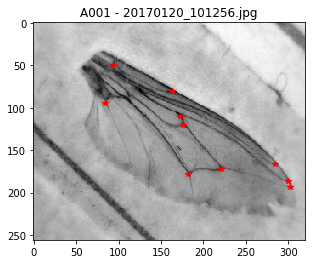

In [18]:
### from PIL import Image
from pylab import *

i=1
# read image to array
im = array(Image.open(image[i]))

# plot the image
imshow(im)# plot the image

# some points
x = [x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i]]
y = [y1[i],y2[i],y3[i],y4[i],y5[i],y6[i],y7[i],y8[i],y9[i],y10[i]]
#x = [x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i]]
#y = [y1[i],y2[i],y3[i],y4[i],y5[i],y6[i],y7[i],y8[i],y9[i],y10[i]]

# plot the points with red star-markers
plot(x,y,"r*")

title(image[i])